In [18]:
import pandas as pd 
import numpy as np
import csv as csv
import seaborn as sns
import matplotlib.pyplot as plt

### Pulling data

In [19]:
#loading in data
idmcFull = pd.read_csv("/workspaces/palestine_refugees_DSCI215/datasets/idmcClean.csv")
idmcFull

,Unnamed: 0,iso3,country_name,year,new_displacement,new_displacement_rounded,total_displacement,total_displacement_rounded
0,1,PSE,State of Palestine,2011,1100,1100,160000,160000
1,2,PSE,State of Palestine,2012,12000,12000,144500,144000
2,3,PSE,State of Palestine,2013,1100,1100,146000,146000
3,4,PSE,State of Palestine,2014,501000,501000,275000,275000
4,5,PSE,State of Palestine,2015,741,740,221425,221000
5,6,PSE,State of Palestine,2016,1601,1600,193277,193000
6,7,PSE,State of Palestine,2017,700,700,231473,231000
7,8,PSE,State of Palestine,2018,490,490,237556,238000
8,9,PSE,State of Palestine,2019,1516,1500,243355,243000
9,10,PSE,State of Palestine,2020,1001,1000,131082,131000


In [23]:
#cleaning data 

#dropping columns taht are usesful
columns_to_drop = ['iso3', 'country_name', 'Unnamed: 0']
idmcClean = idmcFull.drop(columns=columns_to_drop, axis=1)
idmcClean


#renaming cols 
idmcClean = idmcClean.rename(columns= {'new_displacement':'internal_displacements',
                                       'new_displacement_rounded':'internal_displacements_round',
                                       'total_displacement':'idp',
                                       'total_displacement_rounded':'idp_round'})

idmcClean

idmcClean['year'] = idmcClean['year'].astype('int32')
idmcClean['year']

0     2011
1     2012
2     2013
3     2014
4     2015
5     2016
6     2017
7     2018
8     2019
9     2020
10    2021
11    2022
12    2023
Name: year, dtype: int32

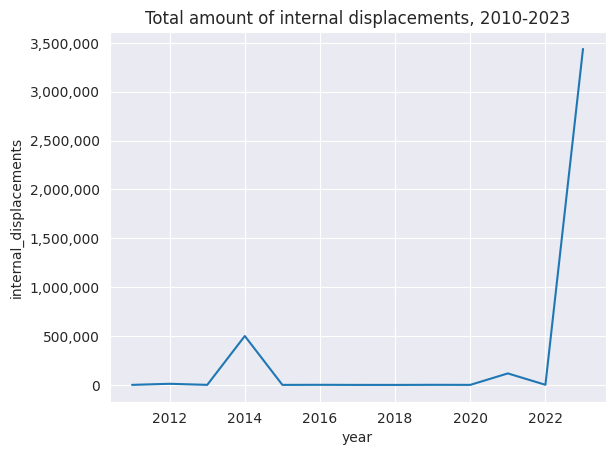

In [24]:
#graphing by year, internal displacements
idmcID_line= sns.lineplot(data = idmcClean,
                            x = 'year', y = 'internal_displacements')
sns.set_style('darkgrid')
plt.title('Total amount of internal displacements, 2010-2023')
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000], ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', '3,500,000'])
plt.show()

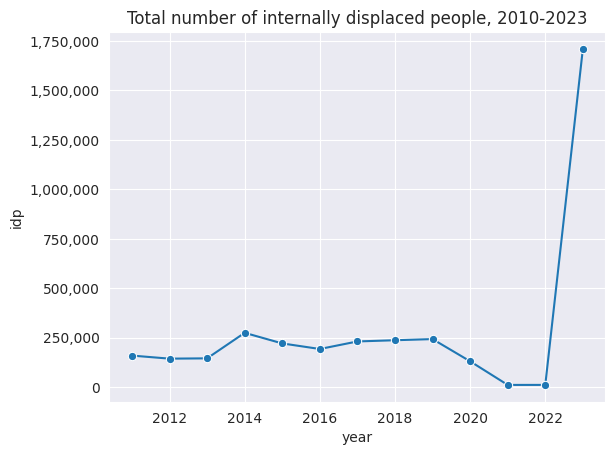

In [27]:
#total number of internally displaced people
unrwaAll_line = sns.lineplot(data = idmcClean,
                            x = 'year', y = 'idp',
                            marker = 'o')
sns.set_style('darkgrid')
plt.title('Total number of internally displaced people, 2010-2023')
plt.yticks([0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000], ['0', '250,000', '500,000', '750,000', '1,000,000', '1,250,000', '1,500,000', '1,750,000'])
plt.show()

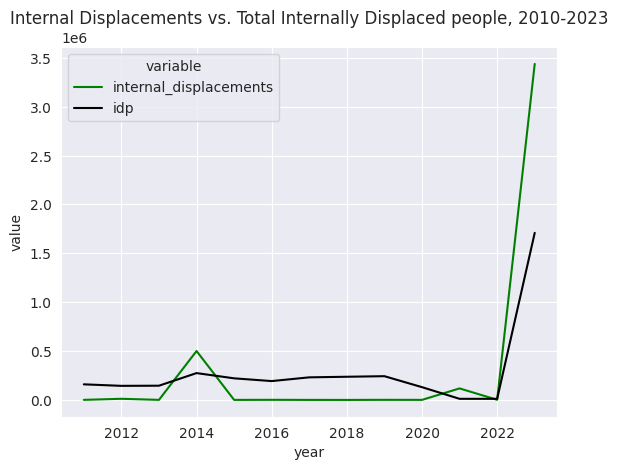

In [26]:
#displacements vs total idp
sns.lineplot(x = 'year', y = 'value', hue = 'variable',
    data = pd.melt(idmcClean, id_vars=['year', 'internal_displacements_round', 'idp_round']),
    palette = ['green', 'black'])
sns.set_style('darkgrid')
plt.title('Internal Displacements vs. Total Internally Displaced people, 2010-2023')
plt.show()

In [ ]:
#https://www.internal-displacement.org/countries/palestine/ - for looking at how the data is shown